In [2]:
#Importanbdo librerias de Python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
#lectura del archivo y vista de las 5 primeras filas
df=pd.read_csv("wine_reviews_dataset.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
# definiendo ruta
path_to_data="./wine_reviews_dataset.csv"

In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [10]:
#clasificando variables
categoricas=["Unnamed: 0","country", "description", "designation", "province", "region_1", "region_2", "taster_name", "taster_twitter_handle", "title", "variety", "winery"]
numericas=(["points", "price"])

In [8]:
# creando nuev tabla df1: contiene country, points, price, variety, winery
df1 = df.drop (columns=["Unnamed: 0", "description", "province",  "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle", "title"])
df1.head()


,country,points,price,variety,winery
0,Italy,87,NaN,White Blend,Nicosia
1,Portugal,87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Pinot Gris,Rainstorm
3,US,87,13.0,Riesling,St. Julian
4,US,87,65.0,Pinot Noir,Sweet Cheeks


In [9]:
# Cuantos missing values hay en el dataset por cada columna
df1.isnull().sum()

country      63
points        0
price      8996
variety       1
winery        0
dtype: int64

<p> Hay muchos datos NaN para precio, </p>

In [13]:
# Principales descriptores estadisticos
df1.describe()


,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


<p> Observamos que hay una gran SD en los precios de los vinos, siendo el más barato 4 y el más caro 3300. 
De manera contraria la SD de los puntos es menor, siendo el puntake minimo 80 y maximo 100.</p>

<AxesSubplot:>

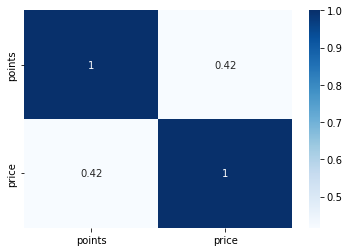

In [14]:
# Evaluando correlación entre precio y puntos
sns.heatmap(df1.corr(), annot=True, cmap='Blues')

<p> R = 0.42 => baja correlación entre puntaje y precio </p>

<AxesSubplot:xlabel='points', ylabel='price'>

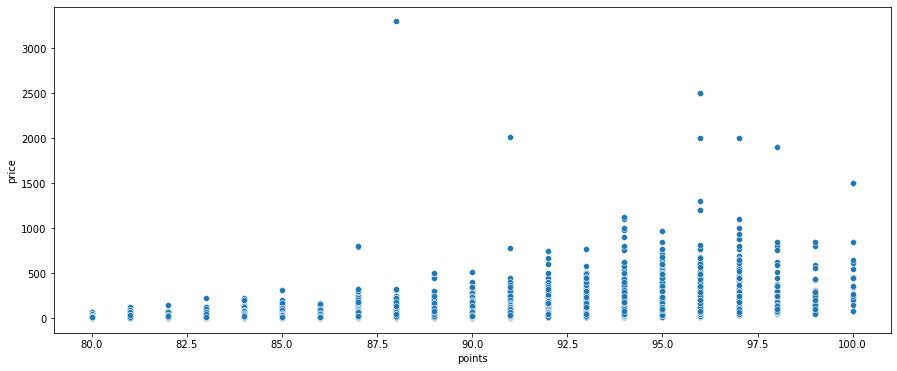

In [16]:
# Evaluando precios vs puntaje 
plt.figure(figsize=(15,6))
sns.scatterplot(data = df1, x= 'points', y ='price')

<p> Se observa que varios vinos más caros tienen más puntaje, pero también hay vinos baratos con muy buen puntaje.</p>

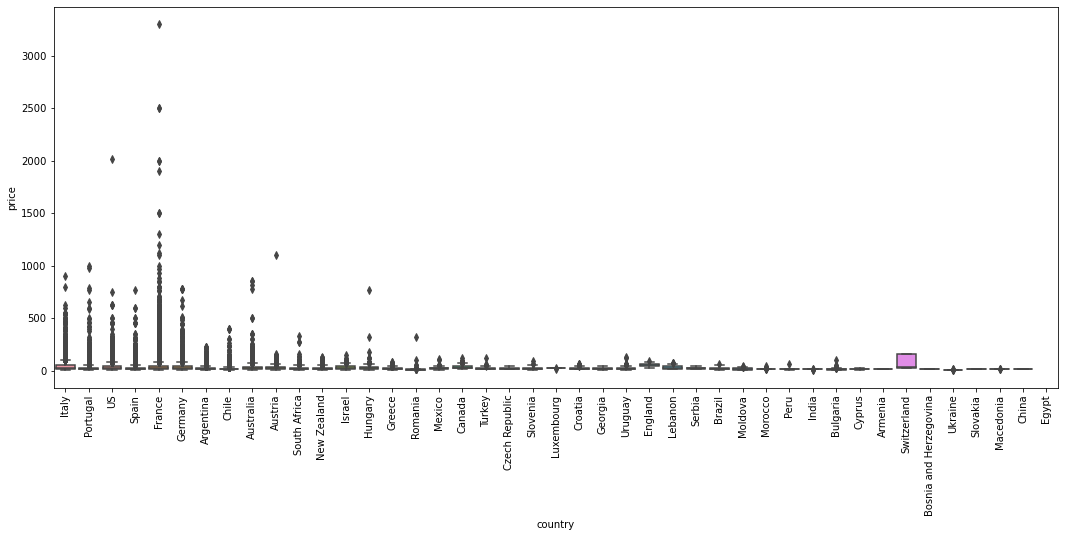

In [15]:
# Evaluando precios por país
fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.boxplot(y='price', x='country', data=df1, ax=ax)
plt.xticks(rotation=90)
plt.show()

<p> Los diagramas de caja están muy cerca uno del otro => difícil hacer una inferencia. 
Se observa que los vinos más caros provienen de paises como Francia (3300), US, Australia, Protugal, Italia, Españas </p>


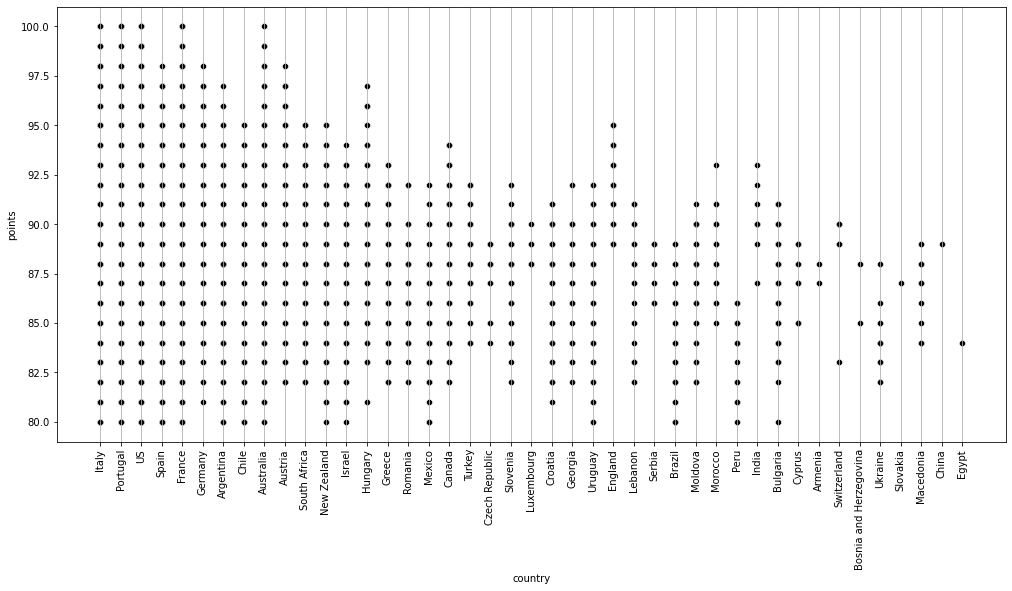

In [19]:
# Evaluando puntajes por país
plt.figure(figsize=(17,8))
sns.scatterplot(data = df1, y='points', x='country', color='black')
plt.grid(axis='x')
plt.xticks(rotation=90);

<p> Se observa que los vinos con puntaje de 100 provienen de Italia, Portugal, Francia y Australia, pero estos mismos paises tambien los puntajes más bajos.
También vemos que países como Inglaterra, Luxemburgo e India no tienen vinos con bajos puntajes </p>

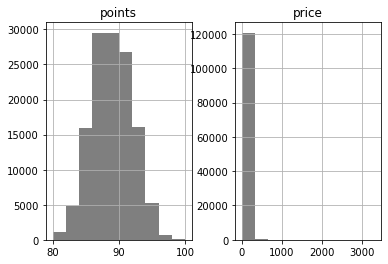

In [17]:
# Evaluando la distribución de los datos
df1.hist(color='k', alpha=0.5, bins=10)
plt.show()


<p> Distribución de puntaje => normal; mientras que distribución de precios está a la izquierda, mayoría tiene precios bajos </p>

In [23]:
bins = [0,300,500,1000,2000,3300]
names = ["0-300","301-500","501-1000","1001-2000","2001-3300"]
df["price"] = pd.cut(df["price"], bins, labels = names)
df.iloc[:, [1,5]]

,country,price
0,Italy,NaN
1,Portugal,0-300
2,US,0-300
3,US,0-300
4,US,0-300
...,...,...
129966,Germany,0-300
129967,US,0-300
129968,France,0-300
129969,France,0-300


In [ ]:
df2=df["price"] = pd.cut(df["price"], bins, labels = names)
sns.displot(df2